## Titanic - Machine Learning from Disaster

#### The Challenge
##### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
##### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
##### In this challenge,  I will  build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### Goal
##### To predict if a passenger survived the sinking of the Titanic or not. 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#statistical description for the training data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Explanatory Data Analysis

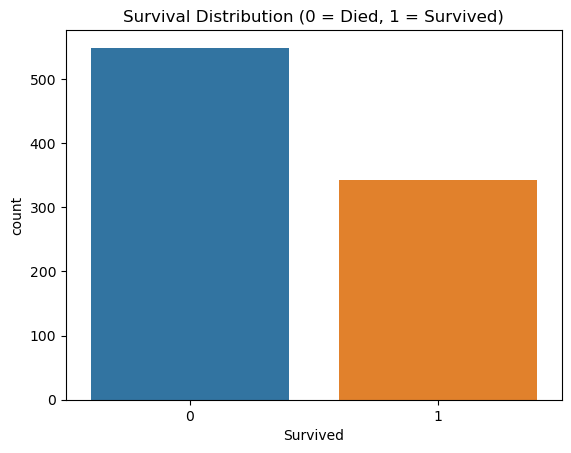

In [7]:
#survival distribution
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.show()

From the graph above, most of the people died  and a few survived. There is also a class imbalance

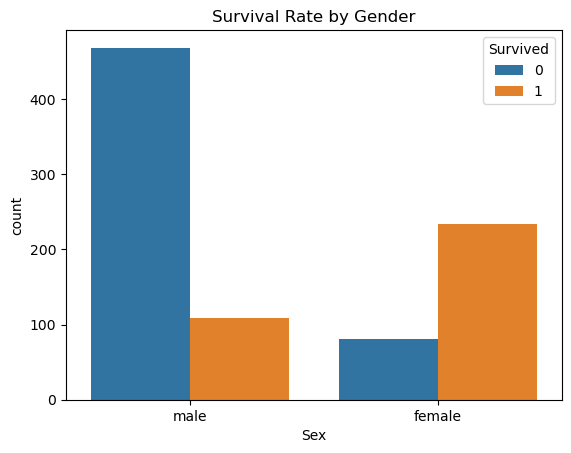

In [8]:
# Ensure the 'Sex' and 'Survived' columns are of string type
train_data['Sex'] = train_data['Sex'].astype(str)
train_data['Survived'] = train_data['Survived'].astype(str)

# Survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

From the graph above, most survived gender were the females as compared to the males.

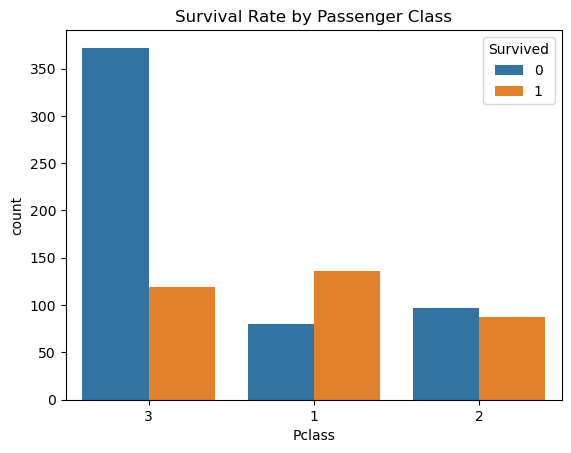

In [9]:
#survival rate by passenger class

train_data['Pclass'] = train_data['Pclass'].astype(str)
train_data['Survived'] = train_data['Survived'].astype(str)

sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

From the above graph, most of the people who survived were from 1st class

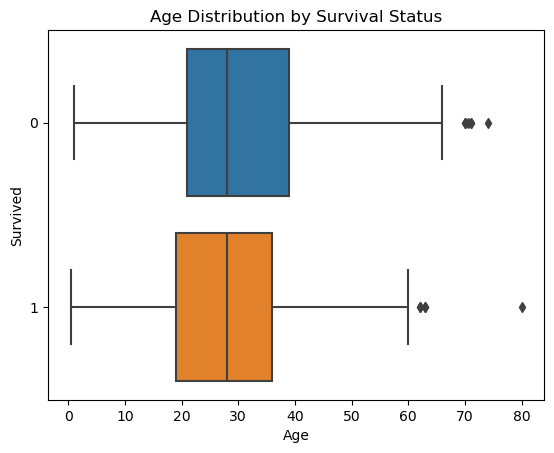

In [10]:
sns.boxplot(x='Age', y='Survived', data=train_data)
plt.title('Age Distribution by Survival Status')
plt.show()

From the above graph, Children and younger passengers had a higher chance of survival compared to older passengers.

Data Preprocessing

In [11]:
#checking for null values
print(train_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
#dropping unnecessary columns and as for cabin it has many missing values
train_data.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [13]:

#filling missing values in age with the median age and embarked with the mode
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace =True)

In [14]:
#Converting categorical values to numerical
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

In [15]:
#get dummies for the embarked column
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

In [16]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,True
887,1,1,0,19.0,0,0,30.0000,False,True
888,0,3,0,28.0,1,2,23.4500,False,True
889,1,1,1,26.0,0,0,30.0000,False,False


Modelling

In [17]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

0.7988826815642458
